Por Camila J. Pulgar Fernández

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/vehicle_gps.csv")

In [3]:
data.head()

,vehicle,latitude,longitude,timestamp
0,A,-33.416709,-70.592693,01-01-2022 8:01
1,A,-33.417425,-70.592487,01-01-2022 8:02
2,A,-33.417831,-70.592367,01-01-2022 8:04
3,A,-33.417879,-70.592018,01-01-2022 8:05
4,A,-33.417818,-70.591653,01-01-2022 8:06


In [4]:
df = data[['latitude', 'longitude']].reset_index()
pos = df.set_index('index').T.to_dict('list')

# Grafo con todos los nodos

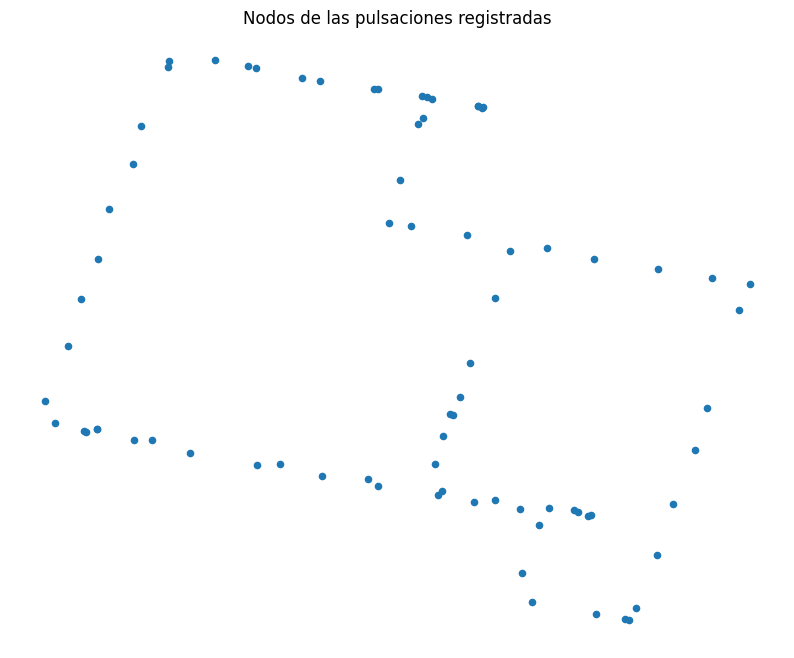

In [43]:
G=nx.Graph()
plt.figure(figsize=(10,8))
plt.title('Nodos de las pulsaciones registradas')

for i in range(0, len(data)):
  G.add_node(i, labels=range(0, len(data)), lat = data['latitude'][i] , long = data['longitude'][i])
  
nx.draw(G, pos=pos, node_size = 20)


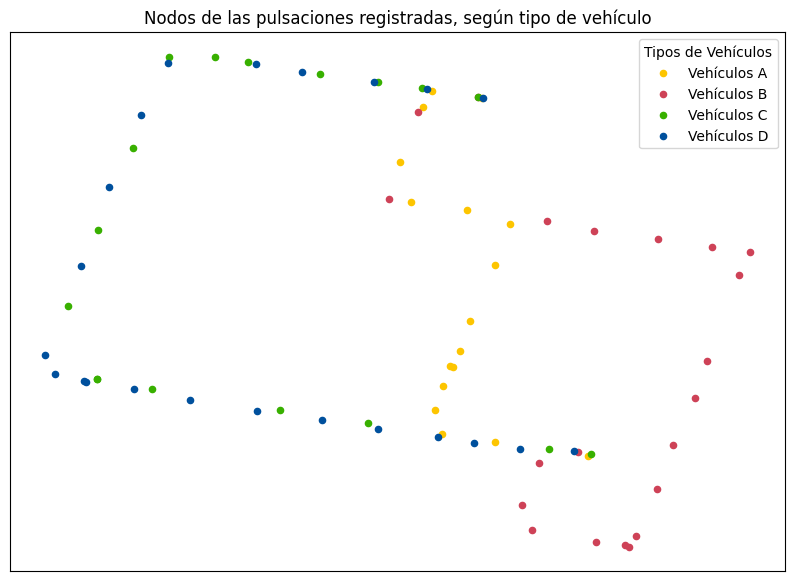

In [44]:
G = nx.Graph()
plt.figure(figsize=(10,7))
plt.title('Nodos de las pulsaciones registradas, según tipo de vehículo')

nodosA = range(0,17)
nodosB = range(17,38)
nodosC = range(38,55)
nodosD = range(55,77)

nx.draw_networkx_nodes(G, pos=pos, nodelist=nodosA, node_color='#fdc500', label='Vehículos A', node_size = 20)
nx.draw_networkx_nodes(G, pos=pos, nodelist=nodosB, node_color='#ce4257', label='Vehículos B', node_size = 20)
nx.draw_networkx_nodes(G, pos=pos, nodelist=nodosC, node_color='#38b000', label='Vehículos C', node_size = 20)
nx.draw_networkx_nodes(G, pos=pos, nodelist=nodosD, node_color='#00509d', label='Vehículos D' , node_size = 20)

nx.draw_networkx_edges(G, pos=pos)
plt.legend(scatterpoints = 1 , title = "Tipos de Vehículos")
plt.show()

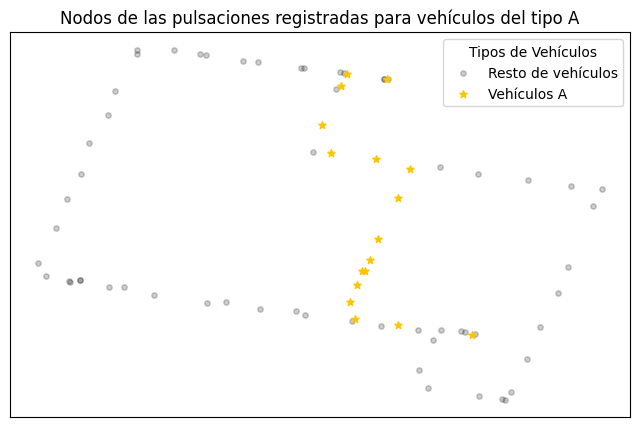

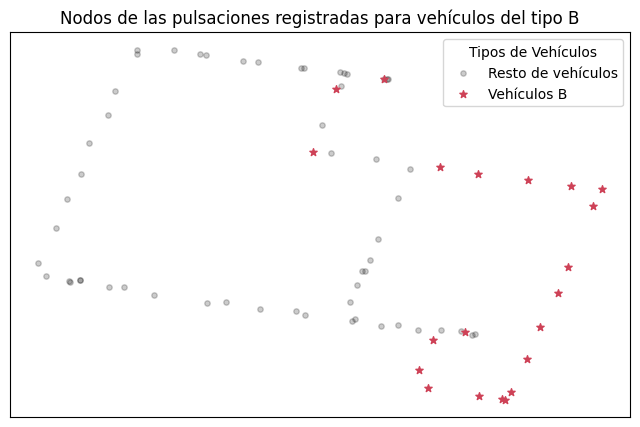

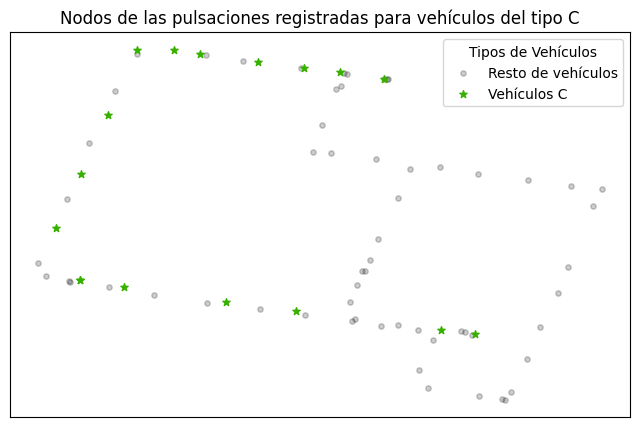

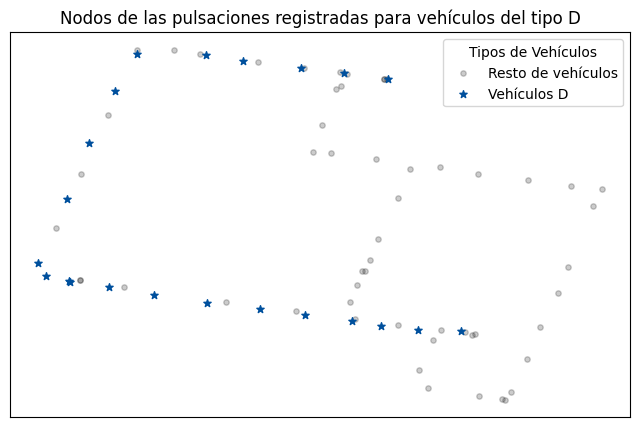

In [45]:
G = nx.Graph()
plt.figure(figsize=(8,5))
plt.title('Nodos de las pulsaciones registradas para vehículos del tipo A')

nodosA = range(0,17)
nodosB = range(17,38)
nodos_B = [*nodosA] + [*nodosC] + [*nodosD]
nodosC = range(38,55)
nodos_C = [*nodosA] + [*nodosB] + [*nodosD]
nodosD = range(55,77)
nodos_D = [*nodosA] + [*nodosB] + [*nodosC]

#Vehículos A
nx.draw_networkx_nodes(G, pos=pos, nodelist=range(17,77), node_color='black', label='Resto de vehículos', node_size = 15, alpha=0.2)
nx.draw_networkx_nodes(G, pos=pos, nodelist=nodosA, node_color='#fdc500', label='Vehículos A', node_size = 30 , node_shape="*")
nx.draw_networkx_edges(G, pos=pos)
plt.legend(scatterpoints = 1 , title = "Tipos de Vehículos")
plt.show()

#Vehículos B
plt.figure(figsize=(8,5))
plt.title('Nodos de las pulsaciones registradas para vehículos del tipo B')
nx.draw_networkx_nodes(G, pos=pos, nodelist= nodos_B, node_color='black', label='Resto de vehículos', node_size = 15, alpha=0.2)
nx.draw_networkx_nodes(G, pos=pos, nodelist=nodosB, node_color='#ce4257', label='Vehículos B', node_size = 30, node_shape="*")

nx.draw_networkx_edges(G, pos=pos)
plt.legend(scatterpoints = 1 , title = "Tipos de Vehículos")
plt.show()

#Vehículos C
plt.figure(figsize=(8,5))
plt.title('Nodos de las pulsaciones registradas para vehículos del tipo C')
nx.draw_networkx_nodes(G, pos=pos, nodelist= nodos_C, node_color='black', label='Resto de vehículos', node_size = 15, alpha=0.2)
nx.draw_networkx_nodes(G, pos=pos, nodelist=nodosC, node_color='#38b000', label='Vehículos C', node_size = 30, node_shape="*")

nx.draw_networkx_edges(G, pos=pos)
plt.legend(scatterpoints = 1 , title = "Tipos de Vehículos")
plt.show()

#Vehículos D
plt.figure(figsize=(8,5))
plt.title('Nodos de las pulsaciones registradas para vehículos del tipo D')
nx.draw_networkx_nodes(G, pos=pos, nodelist= nodos_D, node_color='black', label='Resto de vehículos', node_size = 15, alpha=0.2)
nx.draw_networkx_nodes(G, pos=pos, nodelist=nodosD, node_color='#00509d', label='Vehículos D', node_size = 30, node_shape="*")

nx.draw_networkx_edges(G, pos=pos)
plt.legend(scatterpoints = 1 , title = "Tipos de Vehículos")
plt.show()

#Inclusión de arcos en el grafo.

In [46]:
data2 = data.reset_index()
data2['DateTime'] = pd.to_datetime(data2['timestamp'])
data2['time_diff'] = (data2.DateTime - data2.shift(1).DateTime).dt.total_seconds() / 60
data2.head(4)

,index,vehicle,latitude,longitude,timestamp,DateTime,time_diff
0,0,A,-33.416709,-70.592693,01-01-2022 8:01,2022-01-01 08:01:00,NaN
1,1,A,-33.417425,-70.592487,01-01-2022 8:02,2022-01-01 08:02:00,1.0
2,2,A,-33.417831,-70.592367,01-01-2022 8:04,2022-01-01 08:04:00,2.0
3,3,A,-33.417879,-70.592018,01-01-2022 8:05,2022-01-01 08:05:00,1.0


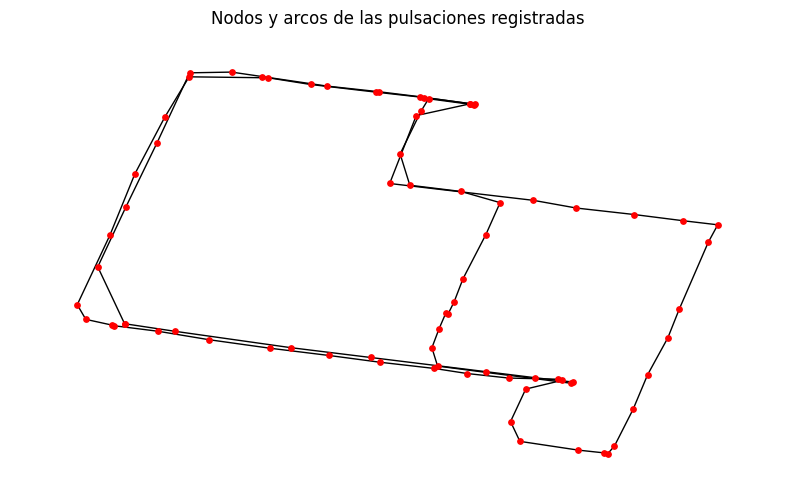

In [47]:
arcos = data2[['index','vehicle']]
vehicles = ['A' , 'B' , 'C' , 'D']
for v in vehicles:
  edge = arcos[arcos['vehicle'] == v].reset_index(drop = True)
  pares = [(edge['index'][i], edge['index'][i+1]) for i in range( len(edge) - 1)]
  G.add_edges_from(pares)
plt.figure(figsize=(10,6))
plt.title('Nodos y arcos de las pulsaciones registradas')
nx.draw(G,pos = pos, node_size = 15, node_color = 'red' , node_shape="o")
#, with_labels=True

# Agregación de los pesos entre nodos.

In [48]:
arcos = data2[['index','vehicle', 'time_diff']]
vehicles = ['A' , 'B' , 'C' , 'D']
for v in vehicles:
  edge = arcos[arcos['vehicle'] == v].reset_index(drop = True)
  pares = [(edge['index'][i], edge['index'][i+1]) for i in range( len(edge) - 1)]
  pesos = edge['time_diff'].tolist()
  pesos.pop(0)
  for a in range(0, len(pares)):
    G[pares[a][0]][pares[a][1]]['weight'] = pesos[a]

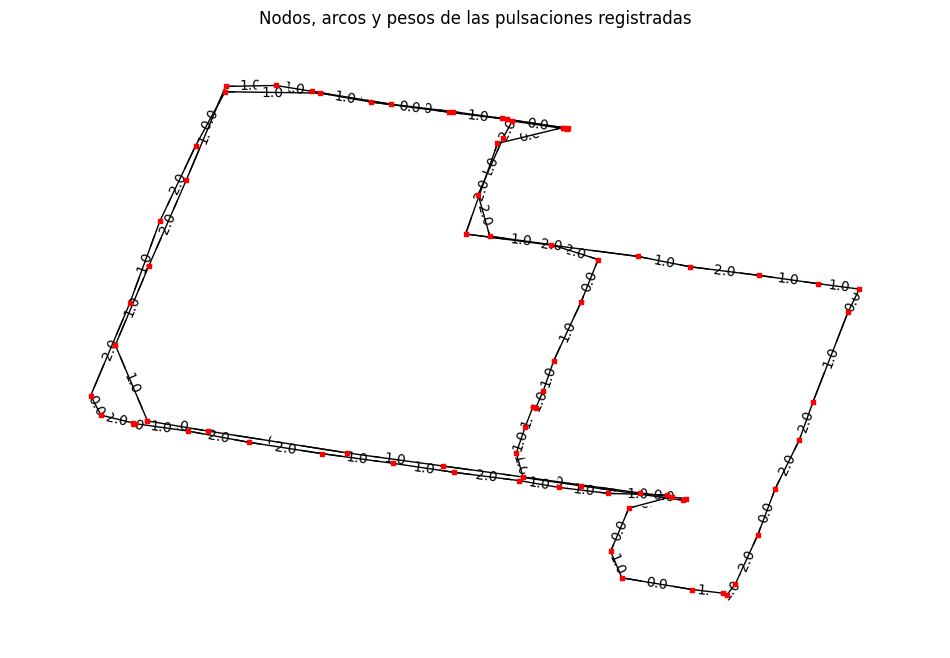

In [49]:
plt.figure(figsize=(12,8))
plt.title('Nodos, arcos y pesos de las pulsaciones registradas')

labels = nx.get_edge_attributes(G,'weight')

nx.draw_networkx(G,pos, node_size = 5, with_labels = False)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw(G,pos = pos, node_size = 5, node_color = 'red' , node_shape="s")

# Función para calcular el tiempo entre dos nodos.

In [50]:
#Se añaden dos arcos, entre 2 caminos que comparten un nodo en común (Camino B y C)
G.add_edge(37,53, weight=2)
G.add_edge(36,54, weight=0)

In [51]:
def get_time(G,i ,f):
  
  #nodos = nx.shortest_path(G, i,f , weight = 'weight')

  try:
    tiempo = nx.shortest_path_length(G, i,f , weight = 'weight')
    nodos = nx.shortest_path(G, i,f , weight = 'weight')
    print('El tiempo total de viaje es: ' + str(tiempo))
    print('Los nodos seleccionados son: ' + str(nodos))
    
    plt.figure(figsize=(8,5))
    plt.title('Camino utilizado para llegar del nodo ' + str(i) + ' al nodo ' + str(f))
    nodes = [*range(0,77)]
    nx.draw_networkx_nodes(G, pos=pos, nodelist= [ elem for elem in nodes if elem not in nodos ], node_color='#240046', label='Nodos restantes', node_size = 15 , alpha = 0.3)
    nx.draw_networkx_nodes(G, pos=pos, nodelist= nodos, node_color='red', label='Nodos escogidos', node_size =30, alpha=1 , node_shape="*")

    nx.draw_networkx_edges(G, pos=pos , alpha = 0.5)
    plt.legend(scatterpoints = 1 , title = "Tipos de nodos")
    plt.show()

  except:
     print("⚠️ Los nodos seleccionados no poseen un camino en común. ⚠️") 


El tiempo total de viaje es: 25.0
Los nodos seleccionados son: [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 54, 53, 52, 51, 50]


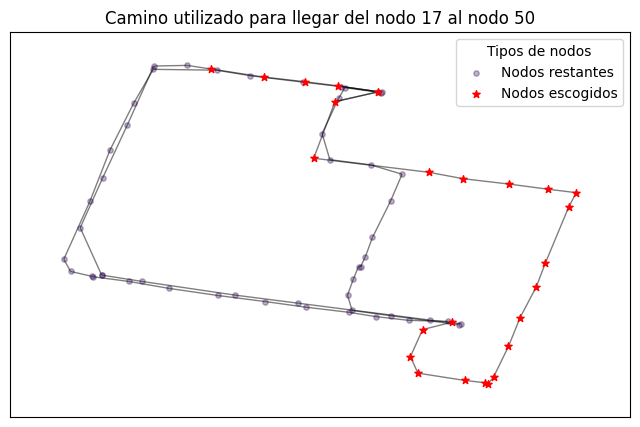

In [52]:
get_time(G, 17 , 50) 